<a href="https://colab.research.google.com/github/RubenQuispe/Machine-Learning-con-Python-001/blob/master/Lab_15_Clustering_Jer%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Jerárquico
## MSc. Rubén Quispe
Bienvenido al laboratorio de clustering jerárquico con python usando package scipy y scikit learn

# Tabla de contenido
1. Clustering Jerárquico-Aglomerativo
<ul>A. Generando datos Random </ul>
<ul>B. Agglomerative Clustering</ul>
2. Clustering on the vehicle Dataset
<ul>A. Data cleaning</ul>
<ul>B. Clustering using scipy</ul>
<ul>C. Clustering using scikit-learn</ul>

# Clustering Jerárquico- Aglomerative
Veremos una técnica de clustering o agrupamient, que es Agglomerative Hierarchical Clustering. Recuerde que la aglomeración es un enfoque de abajo hacia arriba (bottom up)

En este laboratorio analizaremos el agrupamiento aglomerativo que es más popular en el clustering divisivo.

También usaremos complete Linkage como criterio de Linkage.
* Note: También puede intentar usar Average Linkage donda usaría complete linkage para ver la diferencia.


In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Generando datos Random
Generaamos un dataset usando la clase make_blobs.

**Ingreamos los parámetros en make_blobs**

* n_samples: El número total de puntos dividido equitativamente entre los Cluster
<ul>* Eligir el número entre 10-1500</ul>
* Center: El número de centros para generar o las ubicaciones de los centros fijos
<ul>* Elige matrices de cordenadas x,y para generar los centros. Tener entre 1 y 10 centros (ex. centers=[[1,1],[2,5]])</ul>
* cluster_std: La desviación estandar del cluster. Cuanto mayor sea el número, más seprados estaran los clusters.
<ul>* Elija un número entre 0.5-1.5

Guarde el resultado X1 e y1


In [2]:
X1, y1 =make_blobs(n_samples=50, centers=[[4,4],[-2,-1], [1,1],[10,4]], cluster_std=0.9)

In [3]:
X1

array([[ 0.85785747,  1.45252146],
       [-2.20350824, -0.78962394],
       [ 0.76486734,  0.44503586],
       [ 2.71227869,  0.61887988],
       [-1.60086597, -1.34382461],
       [10.35712737,  4.52475497],
       [ 4.65123252,  3.51866153],
       [ 4.64713743,  5.4904847 ],
       [-1.43846132, -1.46834232],
       [ 3.62809457,  3.94847575],
       [ 0.16945215,  1.40640445],
       [ 3.12030969,  3.78158448],
       [11.81213488,  2.69403228],
       [-2.22585263, -1.32005413],
       [ 9.66781713,  4.65351153],
       [-0.47503232, -1.00571936],
       [-1.76054407, -0.63565868],
       [ 9.08006842,  4.11848095],
       [ 9.61332975,  3.72734693],
       [ 0.70170986,  0.25183198],
       [ 9.68418852,  4.27337242],
       [ 4.49363786,  3.92748438],
       [ 1.00859531,  2.51565065],
       [ 1.64294534, -0.12184488],
       [ 3.27298743,  5.4584723 ],
       [ 0.45311417, -1.41681763],
       [ 9.68724457,  4.13012749],
       [ 0.10372255,  0.87151358],
       [ 9.24690301,

In [4]:
y1

array([2, 1, 2, 2, 1, 3, 0, 0, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 2, 3, 0,
       2, 2, 0, 1, 3, 2, 3, 1, 0, 0, 3, 1, 3, 2, 1, 1, 0, 1, 3, 0, 3, 0,
       0, 2, 1, 0, 2, 2])

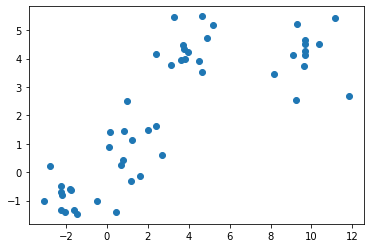

In [5]:
# Trazar el diagrama de dispersión de los datos generados 
plt.scatter(X1[:,0], X1[:,1], marker='o')

# Clustering Aglomerative
Comenzaremos agrupando los puntos de datos aleatorios que acabamos de crear. 
la clase Agglomerative clustering requerirá dos puntos:
* n_clusters: El número de clusters que se formará asi como el número de centros que se generarán.
<ul>* El valor será</ul> 
* linkage: Que criteio de linkage utilizar. El linkage criterion determina que distancia utilizar entre conjunto de observación. El algoritmo fusionará los pares de cluster que minimizan este criterio.
<ul>* El valor será: completo</ul>
<ul>* Nota: se recomienda que pruebe todo con Promedio también 


Guarda el resultado en la variable llamada agglom.



In [6]:
agglom=AgglomerativeClustering(n_clusters=4,linkage='average')

In [7]:
agglom

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

# ajusta el modelo con X2 y y2 a partir de datos generados anteriormente

In [8]:
agglom.fit(X1, y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

ejecute el siguiente codigo para mostrar el cluster.
Recuerde leer el código y los comentarios para comprender mejor cómo funciona el diagrama o trazo

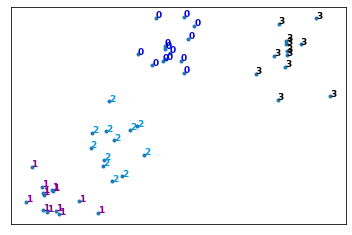

In [9]:
# Crear una figura de tamaño 6 x 4 pulgadas
plt.figure(figsize=(6,4))
# Estos 2 lineas de código se usa para reducir los puutos de datos
# O de lo contrario los puntos de datos estarian muy separados

# crear un rango de min y max de X1
x_min, x_max = np.min(X1, axis=0), np.max(X1,axis=0)

# Obtener la distancia promedio para X1
X1 = (X1-x_min)/(x_max -x_min)

# Este loop muestra todo los puntos de datos
for i in range(X1.shape[0]):
  # reemplaza los puntos de datos con su respectivo valor de cluster
  #(ex.0 ) y esta codificando por colores, con un mapa de colores (plt.cm.spectral)
  plt.text(X1[i,0], X1[i,1], str(y1[i]),
           color =plt.cm.nipy_spectral(agglom.labels_[i]/10.),
           fontdict={'weight': 'bold', 'size': 9})
  
# elimina los ticks y los ejes x e y 
plt.xticks([])
plt.yticks([])
# plt.axis('off')

# Mostrar el trazo del dato original antes del clustering
plt.scatter(X1[:,0], X1[:,1], marker='.')
# mostrar el trazo
plt.show()

# Dendrograma asociado para la agrupación jerárquico aglomerativa
Recuerde que una matriz de distancia contiene la distancia de cada punto a todos los demas puntos de un dataset.
Utilice la función distance_matrix que requiere 2 entradas.
Utilice la feature matrix X2 como ambas entradas y guarde la matriz distancia en la variable dist_matrix

Recuerde que los valores de distancia son simetricos, con una diagonal de ceros. este es una forma de asegurar que la matriz sea correcta.
Imprima dist_matrix para asegurar que sea correcto

In [10]:
dist_matrix =distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.38231415 0.14491296 ... 0.44937908 0.10589122 0.05109487]
 [0.38231415 0.         0.26701236 ... 0.83097142 0.46505561 0.3615622 ]
 [0.14491296 0.26701236 0.         ... 0.5836836  0.20240937 0.10538573]
 ...
 [0.44937908 0.83097142 0.5836836  ... 0.         0.3868045  0.47863626]
 [0.10589122 0.46505561 0.20240937 ... 0.3868045  0.         0.10428179]
 [0.05109487 0.3615622  0.10538573 ... 0.47863626 0.10428179 0.        ]]


Usando la clase linkage de la jerárquica, pase los parametros:

* La distancia de matriz
* complete para un linkage completo

Guarde el resultado en una variable llamada Z

In [11]:
Z= hierarchy.linkage(dist_matrix, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Una agrupación jerárquica se visualiza normalmente con dendograma, como se muestra en la siguiente celda. Cada convinación esta representada por una linea horizontal. La coordenada y de la linea horizontal es la similitud de los 2 grupos que se fusionaron, donde las ciudades se ven como grupos únicos. Al moverse hacia arriba desde la capa inferior al nodo superior, un dendograma nos permite reconstruir el historial de fucniones que resultaron en la agrupación representada.
A continuación guardaremos el dendograma en una variable llamada dendro. Al hacer esto, también se mostrará el dendograma de jerraquía del parámetro.

Z


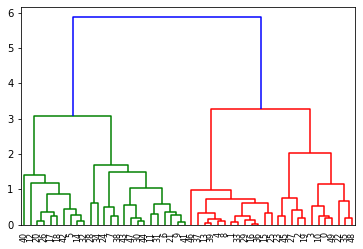

In [12]:
dendro = hierarchy.dendrogram(Z)

# Práctica para ti
Unsamos un likage completo, lo cmbiamos a un linkage promedio para ver como cambia el dendrograma

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


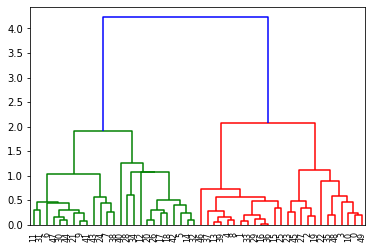

In [13]:
# Aqui tu código
Z= hierarchy.linkage(dist_matrix, 'average')
dendro= hierarchy.dendrogram(Z)

# Clustering sobre un dataset de vehiculos
Imagine que un fabricante de vehiculos ha desarrollado prototipos para un vehículo nuevo. Antes de intruducir el nuevo modelo en su gama , el fabricante quiere determinar que vehículos existentes en el mercado se parecen mas a los prototipos, es decir como se puede agrupar los vehículos, qué grupos es el más similar al modelo y por tanto que modelos estarian competiendo contra ellos.

Nuestro objetivo aqui es utilizar métodos de agrupación para encontrar grupos de vehículos más distintivos. Resumirá los vehículos existentes y ayudará a los fabricantes a tomar decisiones sobre el suministro de nuevos modelos. 


In [14]:
filename= 'cars_clus.csv'
pdf=pd.read_csv(filename)
print('Shape of dataset: ', pdf.shape)

pdf.head()

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


Los conjuntos de caracteristicas incluyen precio en miles (precio), tamaño del motor (ingine_s), caballos de fuerza (horsepow), distancia entre ejes (wheelbas), ancho (ancho), largo (largo), peso en vacio (curb_wgt), capacidad de combustible (fuel_cal) y combustible eficiencia (mpg)

# Data Cleaning
Simplemente borremos el conjunto de datos elimenando las filas que tienen un valor nulo:

In [15]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[['sabe', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf [['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf= pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1989


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,sabe
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,16.919
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,39.384
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,8.588
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,20.397
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,18.780


# Feature Selection
seleccionamos nuestro cojunto de características

In [16]:
featureset=pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [17]:
featureset

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0
...,...,...,...,...,...,...,...,...
112,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0
113,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0
114,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0
115,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0


# Normalizando
Ahora podemos normalizar el conjunto de características.MinMaxScalar transforma características al escalar cada cada característica a un rango determinado. Es por defecto (0,1).Es decir este estimador escala y traduce cada característica individualmente de manera que este entre 0 y 1.


In [18]:
from sklearn.preprocessing import MinMaxScaler
x= featureset.values # retorna una matriz nunpy
min_max_scalar=MinMaxScaler()
feature_mtx = min_max_scalar.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

# Clustering usando Scipy
En esta parteusamos el paquete de scipy para agrupar el dataset, primero calculamos la matriz de distancia


In [19]:
import scipy
leng = feature_mtx.shape[0]
D=scipy.zeros([leng, leng])
for i in range(leng):
  for j in range(leng):
    D[i,j]=scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


En el clustering aglomerativa en cada iteraación el algoritmo debe actualizar la matriz de distancia para reflejar la distancia del grupo recien formado con los grupos restantes en el forest. Los siguientes métodos  son compatibles con scipy para calcular la distancia entre el grupo recien formado y cada uno: simple, completo, promedio, ponderado, centroide.

Usamos completo para nuestro caso, pero sientate libre para cambiarlo para ver como cambian los resultados. 

In [20]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


Esencialmente la agrupación jerárquica no requiere un número predeterminado de agrupaciones. Sin embargo en algunas aplicaciones queremos una particion de clusteres disjuntos como en clústeres planos.
entonces puede usar una linea de corte

In [21]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters =fcluster(Z, max_d,criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

Además, puede determinar la cantidad de clústeres directamente

In [22]:
from scipy.cluster.hierarchy import fcluster
k=5
clusters=fcluster(Z, k , criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

Ahora tracemos el dendrograma

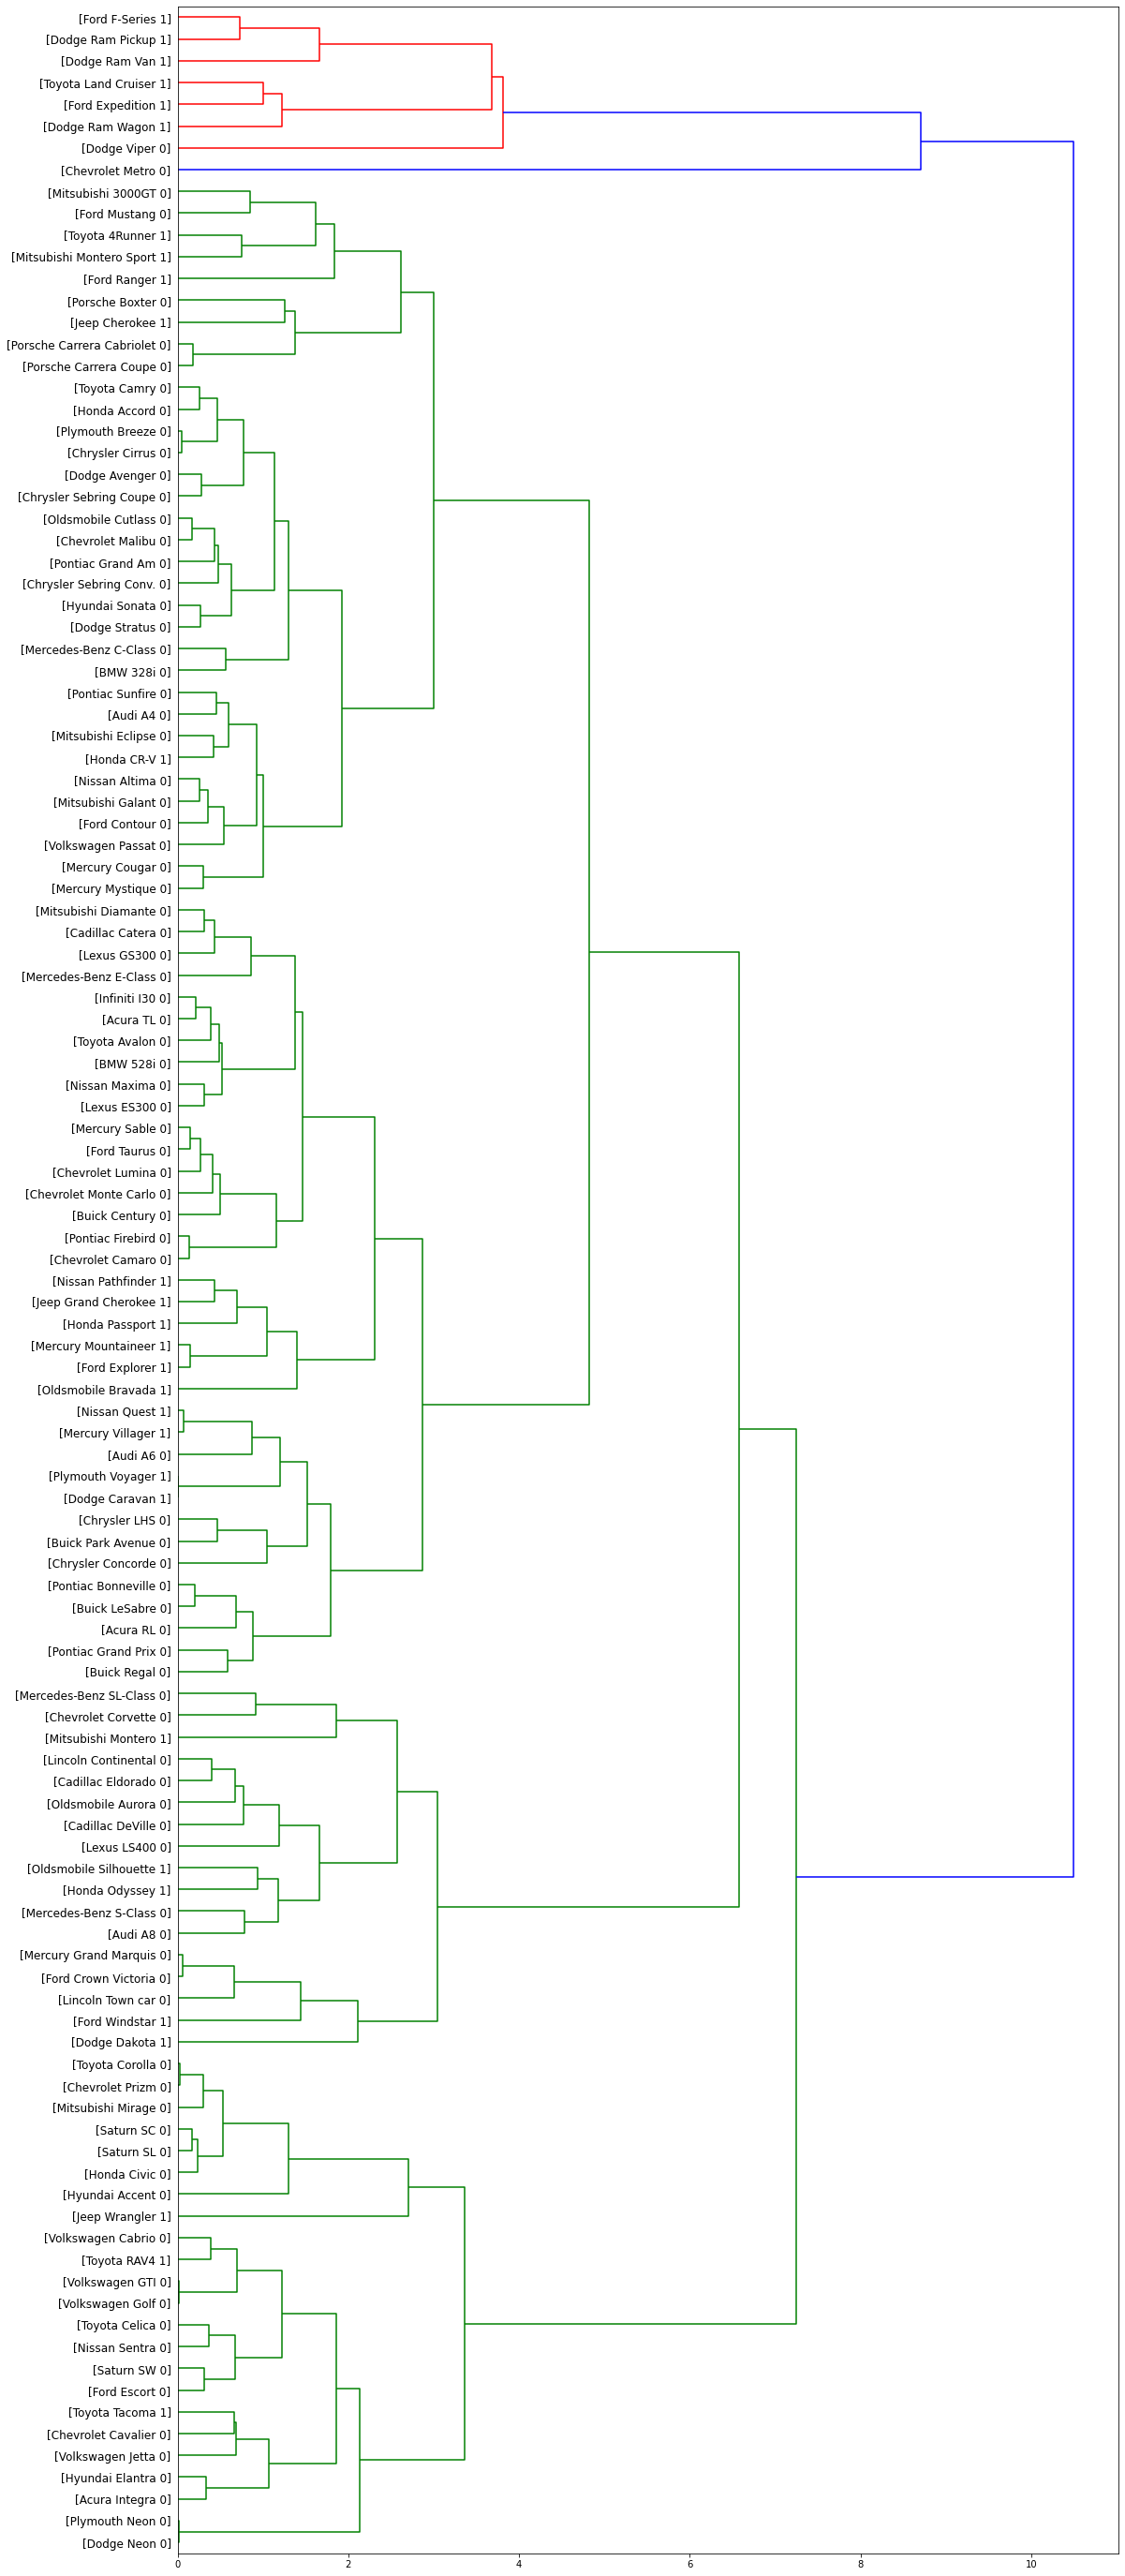

In [23]:
fig=pylab.figure(figsize=(18,50))
def llf(id):
  return'[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))

dendro= hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = 'right')

# Clustering usando scikit learn
Vamos a reacerlos de nuevo pero esta vez usando package de scikit learn

In [24]:
dist_matrix=distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Ahora, podemos usar la función agglomeratveClustering de la librería de scikit learn para agrupar dataset.
AgglomerativeClustering realiza una agrupación jerárquica utilizando un enfoque de abajo hacia arriba. Los criterios de vinculación determinan la metrica utilizada para la estrategia de función.
Ward minimiza la suma de diferencias cuadradas dentro de todo los grupos. Es un enfoque que minimiza la varianza y en este sentido es similar a la función objetivo de K-means pero se aborda con un enfoque jerárquico aglomerativo.
El linkage máximo o completo minimiza la distancia máxima entre observaciones de pares de grupos.
El linkage promedio minimiza el  promedio de las distancias entre todas las observaciones de pares grupos

In [25]:
agglom=AgglomerativeClustering(n_clusters=6, linkage='complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

Y podemos agregar un nuevo campo a nuestro dataframede de datos para mostrar el grupo de cada fila.

In [38]:
pdf['clusters_']=agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,sabe,clusters_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,16.919,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,39.384,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,8.588,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,20.397,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,18.780,2


In [46]:
from pandas import Series, DataFrame
from pandas import Series, DataFrame

import pandas as pd

import json

nan=float('NaN')
data = []
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Crear una figura de 6 pulgadas (aprox 15cm) por 4 pulgadas (aprox 10cm).
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

AttributeError: ignored

<Figure size 1152x1008 with 0 Axes>

Como se puede ver, es una distribución de cada cluster utilizando una trama esparcida, pero no está muy claro dónde es el centroide de cada cluster. Es más, hay 2 tipos de vehículos en nuestro set de datos, "truck" (valor de 1 en la columna tipo) y "car" (valor 1 en la columna tipo). Asi que los usaremos para distinguir las clases y sumarizar el cluster. Primero contamos la cantidad de casos de cada grupo:

In [30]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

KeyError: ignored


Ahora, podemos examinar a las características de cada cluster:

In [36]:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

KeyError: ignored

Es obvio que tenemos 3 clusters principales donde están la mayoría de los vehículos en ellos.

__Coches:__

* Cluster 1: con algo mpg, y poco caballos de fuerza.
* Cluster 2: con buenos mpg y caballos de fuerza, pero un precio más alto que el promedio.
* Cluster 3: con bajo mpg, muchos caballos de fuerza y el precio más alto de todos.

__Camiones:__

* Cluster 1: con el más alto mpg entre los camiones, y lo más bajo en caballos de fuerza y precio.
* Cluster 2: con bajo mpg y media de caballos de fuerza, pero el precio más alto que el promedio.
* Cluster 3: con bueno mpg y caballos de fuerza, bajo precio.

Notar que no utilizamos type , y price de autos en el proceso de clustering, sino que utilizamos clustering Jerárquico para discriminar los clusters con una precisión bastante alta.

In [37]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

NameError: ignored

<Figure size 1152x720 with 0 Axes>